In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\ssrin139\Documents\movies.csv')

In [40]:
df.head()

name rating      genre  \
0                                     The Shining      R      Drama   
1                                 The Blue Lagoon      R  Adventure   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action   
3                                       Airplane!     PG     Comedy   
4                                      Caddyshack      R     Comedy   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [37]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [52]:
df = df.dropna()
print(df.head())

   name  rating  genre  released  score    votes  director  writer  star  \
0  4692       6      6      1304    8.4   927000      1795    2832   699   
1  3929       6      1      1127    5.8    65000      1578    1158   214   
2  3641       4      0      1359    8.7  1200000       757    1818  1157   
3   204       4      4      1127    7.7   221000       889    1413  1474   
4   732       6      4      1170    7.3   108000       719     351   271   

   country    budget      gross  company  runtime  yearcorrect  
0       46  19000000   46998772     1426      146         1980  
1       47   4500000   58853106      452      104         1980  
2       47  18000000  538375067      945      124         1980  
3       47   3500000   83453539     1108       88         1980  
4       47   6000000   39846344     1083       98         1980  


In [42]:
df.dtypes

name         object
rating       object
genre        object
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [43]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['votes']=df['votes'].astype('int64')
df['runtime']=df['runtime'].astype('int64')

In [44]:
df.head()

name rating      genre  \
0                                     The Shining      R      Drama   
1                                 The Blue Lagoon      R  Adventure   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action   
3                                       Airplane!     PG     Comedy   
4                                      Caddyshack      R     Comedy   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.      146  
1   58853106   Columbia Pictures      104  
2  538375067           Lucasfilm      124  
3   83453539  Paramount Pictures       88  
4   39846344      Orion Pictures       98

In [45]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

name rating      genre  \
0                                     The Shining      R      Drama   
1                                 The Blue Lagoon      R  Adventure   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action   
3                                       Airplane!     PG     Comedy   
4                                      Caddyshack      R     Comedy   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  yearcorrect  
0   46998772        Warner Bros.      146         1980  
1   58853106   Columbia Pictures      104         1980  
2  538375067           Lucasfilm      124         1980  
3   83453539  Paramount Pictures       88         1980  
4   39846344      Orion Pictures       98         1980

In [51]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

name  rating  genre  released  score    votes  director  writer  star  \
5445   386       5      0       527    7.8  1100000       785    1263  1534   
7445   388       5      0       137    8.4   903000       105     513  1470   
3045  4909       5      6       534    7.8  1100000       785    1263  1073   
6663  3643       5      0       529    7.8   876000       768    1806   356   
7244   389       5      0       145    8.4   897000       105     513  1470   
7480  4388       4      2      1126    6.9   222000      1012    1361   457   
6653  2117       5      0      1303    7.0   593000       335    2523   293   
6043  3878       5      0      1899    8.0  1300000      1060    1646  1470   
6646  1541       5      0       165    7.1   370000       809     481  1785   
7494  1530       4      2      2053    6.8   148000       277    1383  1036   
6644   387       5      0      1712    7.3   777000      1060    1646  1470   
7247   567       5      0       723    7.3   661000      1716    2687   260   
5845  1731       5      1      1092    8.1   790000       452    2862   379   
7075  3644       5      0       500    7.0   581000      1589    2487   356   
7271  2118       5      0      1384    6.2   277000       764     777   293   
6262  1529       4      2      2082    7.4   585000       277    1383  1036   
7072   477       4      7      1561    7.1   283000       155    2822   533   
7281  1966       4      2      1325    7.6   263000       193     327   344   
7055  4119       5      0        45    6.6   214000       567    1013  1785   
6244  2014       5      0      1881    7.1   779000      1767     837  1470   
6688  2545       4      2      1050    6.4   218000      1144     362  1542   
6846   750       5      0      1910    7.8   694000       105     513   283   
7250   343       5      0       565    6.9   404000       809     699   759   
4245  4407       5      0       516    8.9  1700000      1520    1238   497   
7458  3595       5      0      1136    7.5   359000      1019     479  1738   
7456   755       5      0      1697    6.8   478000        96     182   208   
5878  4950       5      0      1442    6.2   390000      1302     886  1610   
6059  3498       5      0      2148    7.7   642000      1732    2221   373   
6494  4949       5      0      1424    5.6   302000      1302     886  1161   
2448  4388       1      2      1394    8.5   970000      1685    1206  1187   
6047  4048       5      0      1144    8.4  1600000       317    1606   297   
7463  3640       5      0       553    6.5   394000       768     489   356   
7450  2091       6      5      2321    8.4  1000000      1937    2998   844   
7488  4936       1      2      1372    7.7   217000      1052    1525  1735   
5685  4935       1      2      1345    8.2   776000      1162    1525  1735   
4852  2985       5      0      1255    7.3   668000       674    2927   889   
6869  3260       5      0       509    7.8   572000       615     492   555   
7481   206       4      1      1837    6.9   239000       705    1468  1812   
5860  2988       5      0      1803    6.6   492000      1635    2927   889   
7140  1102       4      2      1464    6.3   119000      1144     524  1644   
2245  2115       5      0      1292    8.1   894000      1859    2070  1529   
6908  1411       4      2      1339    7.3   250000        81     153   512   
3451  3637       4      0      1778    6.5   748000       653    1046   550   
5667   215       4      1      1679    6.4   392000      1918    1849  1216   
6863  5329       4      2      1673    8.0   450000       239     390   613   
6045  4240       5      1       492    7.8   773000      1520     967  1166   
3843  1736       4      1      1987    7.6   685000       280    1236   379   
5243  4047       5      0      1116    9.0  2400000       317    1606   297   
6311  1101       4      2      1218    7.3   377000      1556     524  1644   
6905  4322       4      1        53    7.4   264000     

In [11]:
pd.set_option('display.max_rows',None)

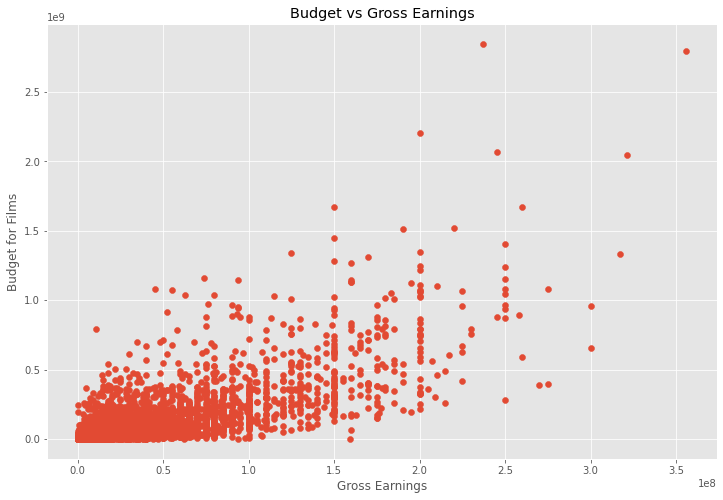

In [13]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Films')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

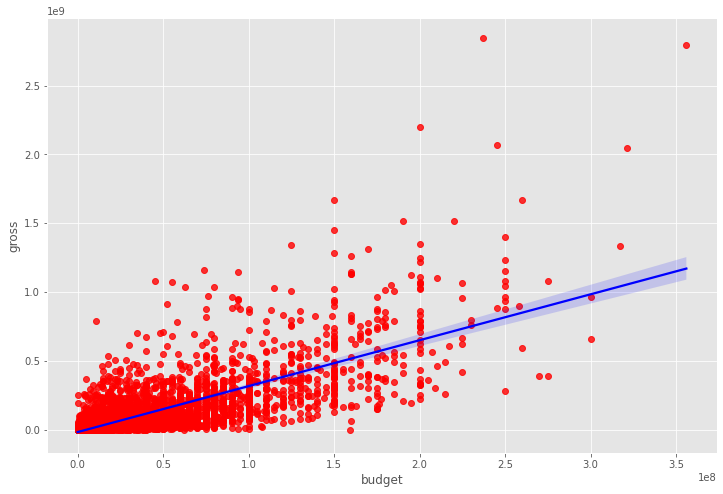

In [14]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [15]:
df.corr(method='pearson')

score     votes    budget     gross   runtime  yearcorrect
score        1.000000  0.474256  0.072001  0.222556  0.414068     0.061923
votes        0.474256  1.000000  0.439675  0.614751  0.352303     0.203098
budget       0.072001  0.439675  1.000000  0.740247  0.318695     0.320312
gross        0.222556  0.614751  0.740247  1.000000  0.275796     0.268721
runtime      0.414068  0.352303  0.318695  0.275796  1.000000     0.075294
yearcorrect  0.061923  0.203098  0.320312  0.268721  0.075294     1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

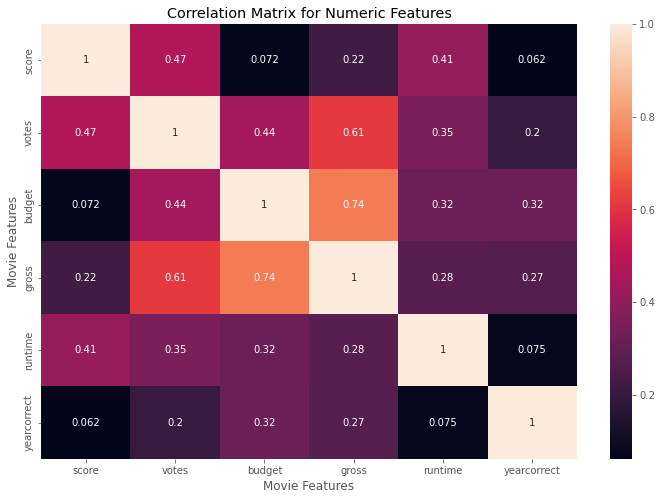

In [16]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [46]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized [col_name]=df_numerized [col_name].astype('category')
        df_numerized [col_name]=df_numerized [col_name].cat.codes
df_numerized.head()

name  rating  genre  released  score    votes  director  writer  star  \
0  4692       6      6      1304    8.4   927000      1795    2832   699   
1  3929       6      1      1127    5.8    65000      1578    1158   214   
2  3641       4      0      1359    8.7  1200000       757    1818  1157   
3   204       4      4      1127    7.7   221000       889    1413  1474   
4   732       6      4      1170    7.3   108000       719     351   271   

   country    budget      gross  company  runtime  yearcorrect  
0       46  19000000   46998772     1426      146         1980  
1       47   4500000   58853106      452      104         1980  
2       47  18000000  538375067      945      124         1980  
3       47   3500000   83453539     1108       88         1980  
4       47   6000000   39846344     1083       98         1980

In [47]:
df.head()

name  rating  genre  released  score    votes  director  writer  star  \
0  4692       6      6      1304    8.4   927000      1795    2832   699   
1  3929       6      1      1127    5.8    65000      1578    1158   214   
2  3641       4      0      1359    8.7  1200000       757    1818  1157   
3   204       4      4      1127    7.7   221000       889    1413  1474   
4   732       6      4      1170    7.3   108000       719     351   271   

   country    budget      gross  company  runtime  yearcorrect  
0       46  19000000   46998772     1426      146         1980  
1       47   4500000   58853106      452      104         1980  
2       47  18000000  538375067      945      124         1980  
3       47   3500000   83453539     1108       88         1980  
4       47   6000000   39846344     1083       98         1980

<function matplotlib.pyplot.show(close=None, block=None)>

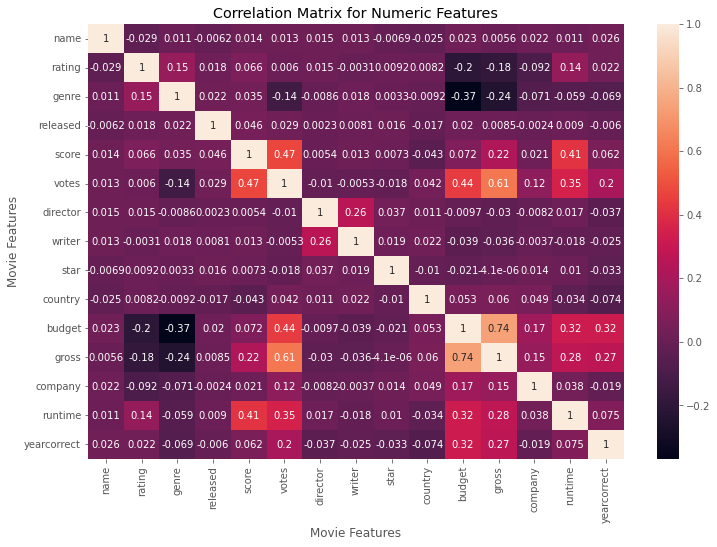

In [27]:
correlation_matrix=df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [28]:
df_numerized.corr()

name    rating     genre  released     score     votes  \
name         1.000000 -0.029234  0.010996 -0.006152  0.014450  0.012615   
rating      -0.029234  1.000000  0.147796  0.018083  0.065983  0.006031   
genre        0.010996  0.147796  1.000000  0.022142  0.035106 -0.135990   
released    -0.006152  0.018083  0.022142  1.000000  0.045874  0.028833   
score        0.014450  0.065983  0.035106  0.045874  1.000000  0.474256   
votes        0.012615  0.006031 -0.135990  0.028833  0.474256  1.000000   
director     0.015246  0.014656 -0.008553  0.002308  0.005413 -0.010376   
writer       0.012880 -0.003149  0.017578  0.008072  0.012843 -0.005316   
star        -0.006882  0.009196  0.003341  0.015706  0.007296 -0.017638   
country     -0.025490  0.008230 -0.009164 -0.017228 -0.043051  0.041551   
budget       0.023392 -0.203946 -0.368523  0.019952  0.072001  0.439675   
gross        0.005639 -0.181906 -0.244101  0.008501  0.222556  0.614751   
company      0.021697 -0.092357 -0.071334 -0.002407  0.020656  0.118470   
runtime      0.010850  0.140792 -0.059237  0.008975  0.414068  0.352303   
yearcorrect  0.025542  0.022021 -0.069147 -0.005989  0.061923  0.203098   

             director    writer      star   country    budget     gross  \
name         0.015246  0.012880 -0.006882 -0.025490  0.023392  0.005639   
rating       0.014656 -0.003149  0.009196  0.008230 -0.203946 -0.181906   
genre       -0.008553  0.017578  0.003341 -0.009164 -0.368523 -0.244101   
released     0.002308  0.008072  0.015706 -0.017228  0.019952  0.008501   
score        0.005413  0.012843  0.007296 -0.043051  0.072001  0.222556   
votes       -0.010376 -0.005316 -0.017638  0.041551  0.439675  0.614751   
director     1.000000  0.261735  0.036593  0.011133 -0.009662 -0.029560   
writer       0.261735  1.000000  0.018520  0.022488 -0.039466 -0.035885   
star         0.036593  0.018520  1.000000 -0.009990 -0.021473 -0.000004   
country      0.011133  0.022488 -0.009990  1.000000  0.052977  0.060078   
budget      -0.009662 -0.039466 -0.021473  0.052977  1.000000  0.740247   
gross       -0.029560 -0.035885 -0.000004  0.060078  0.740247  1.000000   
company     -0.008223 -0.003697  0.014082  0.048569  0.170235  0.149553   
runtime      0.017433 -0.017561  0.010108 -0.034477  0.318695  0.275796   
yearcorrect -0.037371 -0.025495 -0.032687 -0.073569  0.320312  0.268721   

              company   runtime  yearcorrect  
name         0.021697  0.010850     0.025542  
rating      -0.092357  0.140792     0.022021  
genre       -0.071334 -0.059237    -0.069147  
released    -0.002407  0.008975    -0.005989  
score        0.020656  0.414068     0.061923  
votes        0.118470  0.352303     0.203098  
director    -0.008223  0.017433    -0.037371  
writer      -0.003697 -0.017561    -0.025495  
star         0.014082  0.010108    -0.032687  
country      0.048569 -0.034477    -0.073569  
budget       0.170235  0.318695     0.320312  
gross        0.149553  0.275796     0.268721  
company      1.000000  0.037585    -0.018806  
runtime      0.037585  1.000000     0.075294  
yearcorrect -0.018806  0.075294     1.000000

In [49]:
correlation_mat= df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.029234
      genre       0.010996
      released   -0.006152
      score       0.014450
dtype: float64

In [50]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs.head()

budget  genre    -0.368523
genre   budget   -0.368523
        gross    -0.244101
gross   genre    -0.244101
rating  budget   -0.203946
dtype: float64

In [31]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
name         name           1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#votes and gross have the highest correlation to the budget
#company has low correlation